Adapted from https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

# Setup

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

colors = ["#0101DF", "#DF0101"]

In [2]:
df = pd.read_csv('../../../619_Big_Files/06_10_21_Data.csv')

In [3]:
df.head()

,fatal,injury,intersection,alcohol,roadway_departure,lane_departure,dr_sex_1,dr_sex_2,single_vehicle,two_vehicle,...,traff_cntl_cond_2_R,traff_cntl_cond_2_S,traff_cntl_cond_2_T,traff_cntl_cond_2_U,traff_cntl_cond_2_V,traff_cntl_cond_2_Z,invest_agency_cd_A,invest_agency_cd_B,invest_agency_cd_C,invest_agency_cd_Z
0,False,False,True,False,False,False,True,True,False,True,...,False,False,False,False,True,False,False,True,False,False
1,False,False,True,False,False,False,True,True,False,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,False,True,True,False,False,False,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False


In [4]:
df.isnull().sum().max()

0

In [5]:
df.columns

Index(['fatal', 'injury', 'intersection', 'alcohol', 'roadway_departure',
       'lane_departure', 'dr_sex_1', 'dr_sex_2', 'single_vehicle',
       'two_vehicle',
       ...
       'traff_cntl_cond_2_R', 'traff_cntl_cond_2_S', 'traff_cntl_cond_2_T',
       'traff_cntl_cond_2_U', 'traff_cntl_cond_2_V', 'traff_cntl_cond_2_Z',
       'invest_agency_cd_A', 'invest_agency_cd_B', 'invest_agency_cd_C',
       'invest_agency_cd_Z'],
      dtype='object', length=659)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160186 entries, 0 to 160185
Columns: 659 entries, fatal to invest_agency_cd_Z
dtypes: bool(659)
memory usage: 100.7 MB
None


In [7]:
df.select_dtypes(include=[np.number]).columns 

Index([], dtype='object')

# Options for Independent Variable

## Fatal

In [8]:
# The classes are heavily skewed we need to solve this issue later.
print('Nonfatal', round(df['fatal'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fatal', round(df['fatal'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Nonfatal 99.57 % of the dataset
Fatal 0.43 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: Nonfatal || 1: Fatal)')

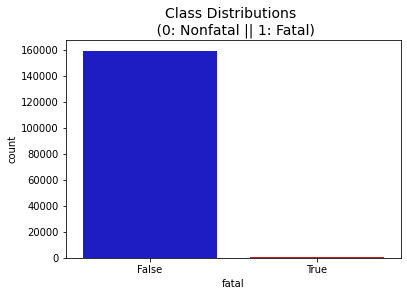

In [9]:
sns.countplot('fatal', data=df, palette=colors)
plt.title('Class Distributions \n (0: Nonfatal || 1: Fatal)', fontsize=14)

## Injury

In [10]:
# The classes are heavily skewed we need to solve this issue later.
print('Noninjury', round(df['injury'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Injury', round(df['injury'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Noninjury 72.0 % of the dataset
Injury 28.0 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: Noninjury || 1: Injury)')

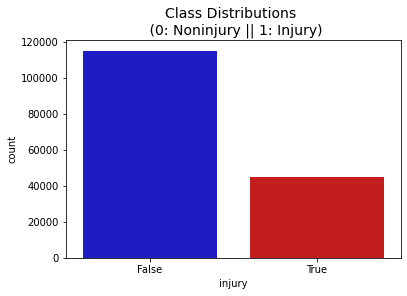

In [11]:
sns.countplot('injury', data=df, palette=colors)
plt.title('Class Distributions \n (0: Noninjury || 1: Injury)', fontsize=14)

## Choose Independent Variable

In [12]:
df.rename(columns={'fatal':'independent'}, inplace=True)
df.head()

,independent,injury,intersection,alcohol,roadway_departure,lane_departure,dr_sex_1,dr_sex_2,single_vehicle,two_vehicle,...,traff_cntl_cond_2_R,traff_cntl_cond_2_S,traff_cntl_cond_2_T,traff_cntl_cond_2_U,traff_cntl_cond_2_V,traff_cntl_cond_2_Z,invest_agency_cd_A,invest_agency_cd_B,invest_agency_cd_C,invest_agency_cd_Z
0,False,False,True,False,False,False,True,True,False,True,...,False,False,False,False,True,False,False,True,False,False
1,False,False,True,False,False,False,True,True,False,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,False,True,True,False,False,False,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False


## Split into Train and Test

In [13]:
print('Independent = 0', round(df['independent'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Independent = 1', round(df['independent'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('independent', axis=1)
y = df['independent']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Independent = 0 99.57 % of the dataset
Independent = 1 0.43 % of the dataset
Train: [ 32016  32017  32018 ... 160183 160184 160185] Test: [    0     1     2 ... 39433 39515 40210]
Train: [     0      1      2 ... 160183 160184 160185] Test: [32016 32017 32018 ... 68809 68872 68944]
Train: [     0      1      2 ... 160183 160184 160185] Test: [64053 64054 64055 ... 97553 97703 98159]
Train: [     0      1      2 ... 160183 160184 160185] Test: [ 96104  96105  96106 ... 128146 128147 128239]
Train: [     0      1      2 ... 128146 128147 128239] Test: [128148 128149 128150 ... 160183 160184 160185]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99574714 0.00425286]
[0.99575491 0.00424509]


# Create Subsample with Balanced Classes

In [14]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fatal classes 681 rows.
independent_df = df.loc[df['independent'] == 1]
print ("Number of independent == 1: ", len(independent_df))
non_independent_df = df.loc[df['independent'] == 0][:len(independent_df)]

normal_distributed_df = pd.concat([independent_df, non_independent_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

print ('Length of new_df = ', len(new_df))
new_df.head()

Number of independent == 1:  681
Length of new_df =  1362


,independent,injury,intersection,alcohol,roadway_departure,lane_departure,dr_sex_1,dr_sex_2,single_vehicle,two_vehicle,...,traff_cntl_cond_2_R,traff_cntl_cond_2_S,traff_cntl_cond_2_T,traff_cntl_cond_2_U,traff_cntl_cond_2_V,traff_cntl_cond_2_Z,invest_agency_cd_A,invest_agency_cd_B,invest_agency_cd_C,invest_agency_cd_Z
109475,True,True,False,False,False,False,True,True,False,True,...,True,False,False,False,False,False,True,False,False,False
158695,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
77427,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
52749,True,True,False,False,False,False,True,True,False,True,...,True,False,False,False,False,False,True,False,False,False
18628,False,False,False,True,True,True,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False


Distribution of the Classes in the subsample dataset
False    0.5
True     0.5
Name: independent, dtype: float64


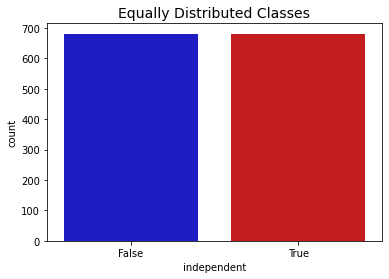

In [15]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['independent'].value_counts()/len(new_df))

sns.countplot('independent', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [25]:
A =  new_df[new_df.columns].corr()['independent']
A = A.sort_values(ascending=False)
A.head(20)

independent                           1.000000
lane_departure                        0.493718
veh_severity_cd_B                     0.493157
dr_cond_cd2_Z                         0.430601
roadway_departure                     0.421656
man_coll_cd_A                         0.418434
vision_obscure_2_Z                    0.392547
single_vehicle                        0.392346
veh_cond_cd2_Z                        0.383112
movement_reason_2_Z                   0.380200
veh_type_cd2_Z                        0.380091
invest_agency_cd_A                    0.362696
dr_age_2_bin_0                        0.359778
traff_cntl_cond_2_Z                   0.354917
dr_cond_cd1_Z                         0.322880
city_cd_0                             0.306362
crash_type_A                          0.301169
lighting_cd_B                         0.300893
pri_dist_bin_(2901.02, 52794720.0]    0.296144
alcohol                               0.285931
Name: independent, dtype: float64

In [27]:
A = A.sort_values(ascending=True)
A.head(20)

dr_cond_cd2_A         -0.438467
f_harm_ev_cd1_S       -0.424377
two_vehicle           -0.390577
veh_cond_cd2_K        -0.390002
vision_obscure_2_N    -0.389031
veh_severity_cd_D     -0.386561
m_harm_ev_cd1_S       -0.376153
crash_type_S          -0.364439
dr_cond_cd1_B         -0.317835
movement_reason_2_P   -0.316499
invest_agency_cd_B    -0.300066
lighting_cd_A         -0.286811
man_coll_cd_B         -0.269900
veh_type_cd2_A        -0.265980
ped_actions_1_Z       -0.255815
road_rel_cd_A         -0.243338
man_coll_cd_J         -0.228102
crash_type_U          -0.213599
veh_lighting_2_B      -0.204310
hwy_type_cd_E         -0.203291
Name: independent, dtype: float64

# Screw being balanced.  Go for Confusion Matrix

## If most of the values in a column are True, swap True/False.

In [39]:
for colname in df.columns:
    if 2*df[colname].sum() > len(df):
        df[colname] = ~(df[colname])

In [40]:
df.sum().sort_values(ascending=False)

dr_cond_cd1_B          79780
crash_type_S           76102
veh_severity_cd_D      75347
veh_type_cd1_A         70301
movement_reason_1_L    67416
                       ...  
bypass_`                   1
city_cd_44                 1
veh_lighting_1_D           1
city_cd_17                 1
bypass_Sp                  1
Length: 659, dtype: int64

In [50]:
C = ['Feature', 'TN', 'FP', 'FN', 'TP', 'Recall', 'Precision', 'F1']
A = []
for colname in df.columns:
    confusion_matrix = pd.crosstab(df['independent'], df[colname], rownames=['Actual'], colnames=['Predicted'])
    Feature = colname
    TN = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
#    Balanced_Precision = TP/(TP)
    F1 = 2/(1/Recall + 1/Precision)
    A.append([Feature, TN, FP, FN, TP, round(Recall,2), round(Precision,2), round(F1,2)])
B = pd.DataFrame(A, columns=C)

In [51]:
B.head()

,Feature,TN,FP,FN,TP,Recall,Precision,F1
0,independent,159505,0,0,681,1.00,1.00,1.00
1,injury,114937,398,44568,283,0.01,0.42,0.01
2,intersection,100808,537,58697,144,0.00,0.21,0.00
3,alcohol,155001,529,4504,152,0.03,0.22,0.06
4,roadway_departure,132075,276,27430,405,0.01,0.59,0.03


In [54]:
B = B.sort_values(by=['Recall'], ascending=False)
B.head(20)

,Feature,TN,FP,FN,TP,Recall,Precision,F1
0,independent,159505,0,0,681,1.00,1.00,1.00
57,ped_actions_1_E,159500,679,5,2,0.29,0.00,0.01
517,dr_cond_cd2_I,159489,677,16,4,0.20,0.01,0.01
593,sec_contrib_fac_cd_L,159454,669,51,12,0.19,0.02,0.03
60,ped_actions_1_H,159495,679,10,2,0.17,0.00,0.01
544,pri_contrib_fac_cd_L,159446,671,59,10,0.14,0.01,0.03
59,ped_actions_1_G,159492,679,13,2,0.13,0.00,0.01
55,ped_actions_1_C,159352,661,153,20,0.12,0.03,0.05
58,ped_actions_1_F,159437,672,68,9,0.12,0.01,0.02
545,pri_contrib_fac_cd_M,159121,632,384,49,0.11,0.07,0.09


In [56]:
B = B.sort_values(by=['Precision'], ascending=False)
B.head(20)

,Feature,TN,FP,FN,TP,Recall,Precision,F1
0,independent,159505,0,0,681,1.00,1.00,1.00
656,invest_agency_cd_B,96422,200,63083,481,0.01,0.71,0.01
5,lane_departure,127866,202,31639,479,0.01,0.70,0.03
630,movement_reason_2_P,97511,209,61994,472,0.01,0.69,0.01
509,dr_cond_cd2_A,120762,213,38743,468,0.01,0.69,0.02
562,city_cd_0,98562,210,60943,471,0.01,0.69,0.02
150,f_harm_ev_cd1_S,125305,237,34200,444,0.01,0.65,0.03
520,dr_cond_cd2_Z,124289,237,35216,444,0.01,0.65,0.02
311,veh_lighting_2_Z,101038,248,58467,433,0.01,0.64,0.01
9,two_vehicle,124280,250,35225,431,0.01,0.63,0.02


In [57]:
B = B.sort_values(by=['F1'], ascending=False)
B.head(20)

,Feature,TN,FP,FN,TP,Recall,Precision,F1
0,independent,159505,0,0,681,1.00,1.00,1.00
494,m_harm_ev_cd1_O,158535,595,970,86,0.08,0.13,0.10
596,crash_type_A,157915,560,1590,121,0.07,0.18,0.10
64,ped_actions_1_Z,158315,592,1190,89,0.07,0.13,0.09
143,f_harm_ev_cd1_O,158625,604,880,77,0.08,0.11,0.09
545,pri_contrib_fac_cd_M,159121,632,384,49,0.11,0.07,0.09
599,crash_type_D,158066,597,1439,84,0.06,0.12,0.08
15,veh_type_cd1_E,158628,618,877,63,0.07,0.09,0.08
54,ped_actions_1_B,159195,651,310,30,0.09,0.04,0.06
3,alcohol,155001,529,4504,152,0.03,0.22,0.06
